<img src="imagens/Boas vindas.png">

# Sumário - Classificação

1) **Acurácia**

2) **Precisão**

3) **Recall**

4) **F1-Score**

5) **Exemplo**

# 1. Acurácia

### Acurácia é uma medida de desempenho usada para avaliar a precisão de um modelo de machine learning. 

É definida como o **número de acertos dividido pelo total de previsões**.

$$
\text{Acurácia} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+\text{FN}}
$$

* **TP**: Padrões pertencentes à Classe Positiva, que foram classificados como pertencentes à Classe Positiiva;
* **TN**: Padrões pertencentes à Classe Negativa, que foram classificados como pertencentes à Classe Negativa;
* **FP**: Padrões pertencentes à Classe Negativa, que foram classificados como pertencentes à Classe Positiiva;
* **FN**: Padrões pertencentes à Classe Positiva, que foram classificados como pertencentes à Classe Negativa.

### Estas métricas são extraídas da Matriz de Confusão

<img src="imagens/confusionmatrix.png" style="margin:auto">

Por exemplo, se você tivesse um modelo que tentasse classificar imagens de gatos e cachorros, você poderia **calcular a acurácia comparando as previsões** do modelo com as classes reais das imagens em um conjunto de dados de teste.

Se o modelo classificasse corretamente 90% das imagens de teste, **sua acurácia seria de 0,9.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
params = {'legend.fontsize': 20,
          'figure.figsize': (15,5),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20}

In [2]:
# gera dados aleatórios
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=100)
y = np.where(X > 0, 1, 0)

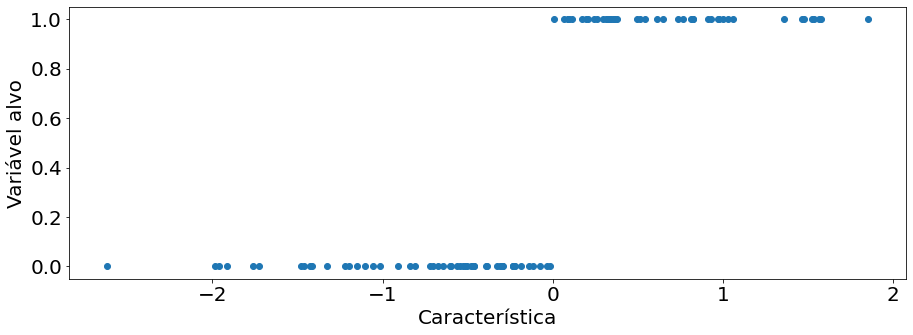

In [6]:
# visualiza os dados
pylab.rcParams.update(params)
plt.scatter(X, y)
plt.xlabel('Característica')
plt.ylabel('Variável alvo')
plt.show()

In [7]:
# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, 
                                                    test_size = 0.2, random_state = 42)

In [8]:
# ajusta o modelo de regressão logística aos dados de treinamento
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

# faz previsões nos dados de teste
y_pred = model.predict(X_test)

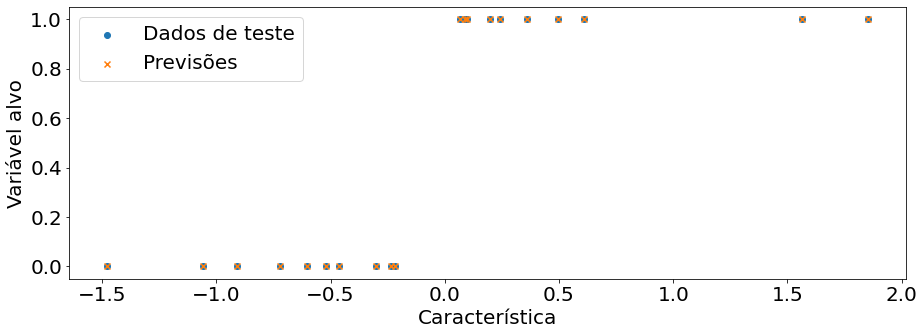

In [9]:
# visualiza as previsões do modelo
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, marker = 'x')
plt.xlabel('Característica')
plt.ylabel('Variável alvo')
plt.legend(['Dados de teste', 'Previsões'])
plt.show()

In [10]:
# calcula a acurácia
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print("Acurácia em procentagem:", acc*100)

Acurácia: 1.00
Acurácia em procentagem: 100.0


In [11]:
from sklearn.datasets import make_classification

In [12]:
# gera dados aleatórios
X, y = make_classification(n_samples = 1000, n_features = 10, n_informative = 5, 
                           n_redundant = 2, n_classes = 2, random_state = 42)

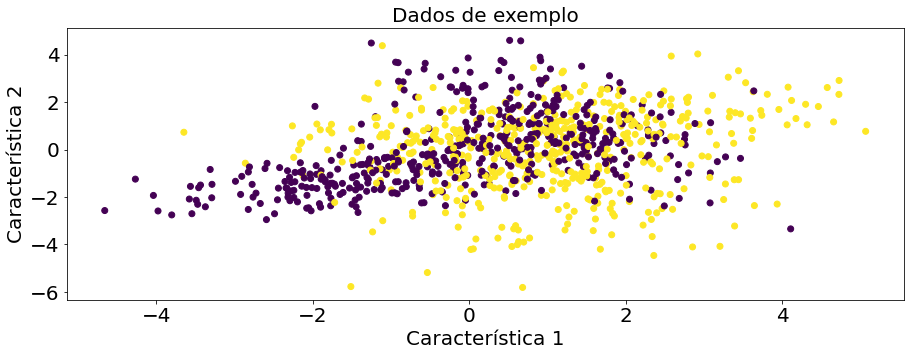

In [13]:
# visualiza os dados
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Dados de exemplo')
plt.show()

In [14]:
# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# ajusta o modelo de regressão logística aos dados de treinamento
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

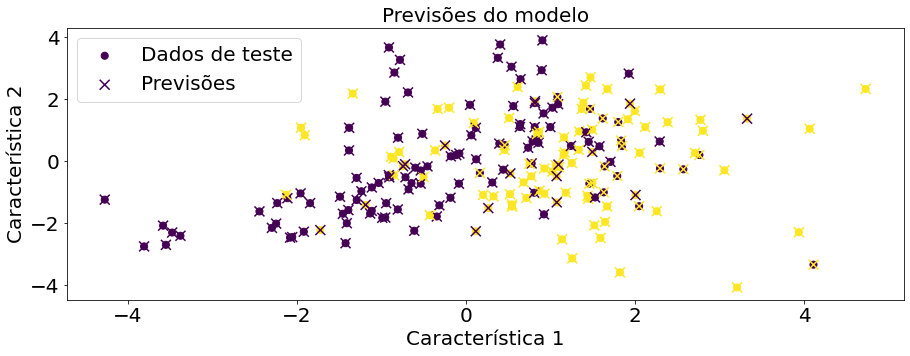

In [20]:
# visualiza as previsões do modelo
fig, ax = plt.subplots()
ax.scatter(X_test[:,0], X_test[:,1], c = y_test, s = 50)
ax.scatter(X_test[:,0], X_test[:,1], c = y_pred, marker = 'x', s = 100)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Previsões do modelo')
ax.legend(['Dados de teste', 'Previsões'])
plt.show()

In [21]:
# calcula a acurácia
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print("Acurácia em procentagem:", acc*100)

Acurácia: 0.83
Acurácia em procentagem: 83.5


# 2. Precisão

### A precisão (Precision) é uma métrica comumente usada para avaliar a qualidade de um modelo de classificação.

**A precisão é definida como a proporção de exemplos positivos que foram classificados corretamente pelo modelo em relação a todos os exemplos classificados como positivos pelo modelo (verdadeiros positivos + falsos positivos).**

Em outras palavras, a precisão mede a capacidade do modelo de **identificar corretamente os exemplos positivos**.

$$
\text{Precisão} = \frac{\text{TP}}{\text{TP}+\text{FP}}
$$

* **TP**: Padrões pertencentes à Classe Positiva, que foram classificados como pertencentes à Classe Positiiva;
* **FP**: Padrões pertencentes à Classe Negativa, que foram classificados como pertencentes à Classe Positiiva.

**A precisão é uma métrica importante porque, em alguns casos, é mais importante evitar falsos positivos do que falsos negativos.**

Por exemplo, em um sistema de detecção de spam, é melhor ter alguns e-mails legítimos sendo classificados como spam (falso positivo) do que permitir que e-mails de spam passem pela filtragem (falso negativo)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# gera dados aleatórios
np.random.seed(42)
X = np.random.normal(loc = 0, scale = 1, size = 100)
y = np.where(X > 0, 1, 0)

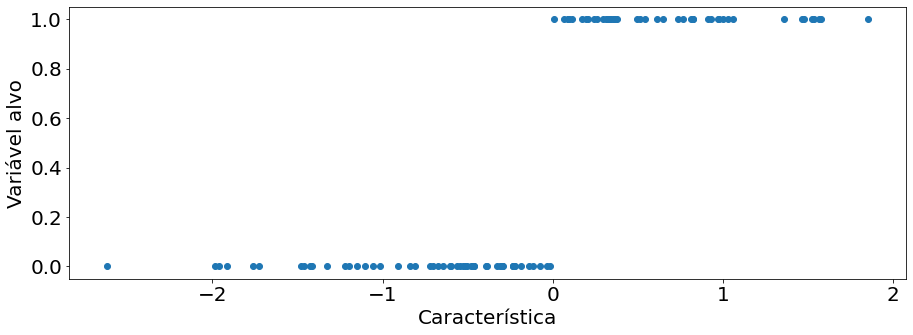

In [23]:
# visualiza os dados
plt.scatter(X, y)
plt.xlabel('Característica')
plt.ylabel('Variável alvo')
plt.show()

In [24]:
# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size = 0.2, random_state = 42)

# ajusta o modelo de regressão logística aos dados de treinamento
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

# faz previsões nos dados de teste
y_pred = model.predict(X_test)

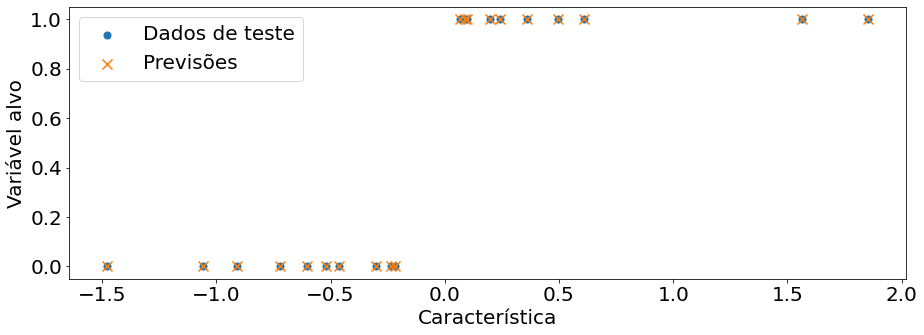

In [25]:
# visualiza as previsões do modelo
plt.scatter(X_test, y_test, s = 50)
plt.scatter(X_test, y_pred, marker='x', s = 100)
plt.xlabel('Característica')
plt.ylabel('Variável alvo')
plt.legend(['Dados de teste', 'Previsões'])
plt.show()

In [26]:
# calcula a acurácia e precisão
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print("Acurácia em procentagem:", acc*100)
print(f'Precisão: {precision:.2f}')
print("Precisão em procentagem:", precision*100)

Acurácia: 1.00
Acurácia em procentagem: 100.0
Precisão: 1.00
Precisão em procentagem: 100.0


## Matriz de Confusão

**A matriz de confusão é uma tabela que mostra a frequência das classificações corretas e incorretas de um modelo em relação aos dados de teste.**

A matriz tem duas dimensões: linhas representam as classes reais e as colunas representam as classes previstas pelo modelo. Assim, a diagonal principal da matriz representa as classificações corretas e as demais células representam as classificações incorretas.

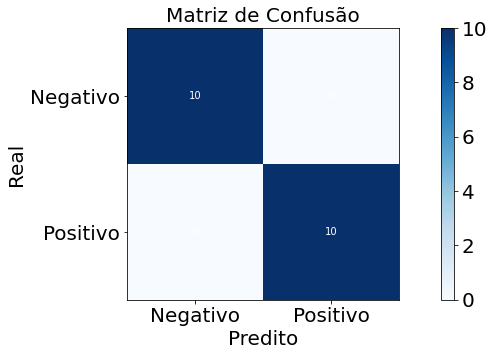

In [28]:
# plota matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap = 'Blues', interpolation = 'nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

In [29]:
# gera dados aleatórios
X, y = make_classification(n_samples = 1000, n_features = 10, 
                           n_informative = 5, n_redundant = 2, n_classes = 2, random_state = 42)

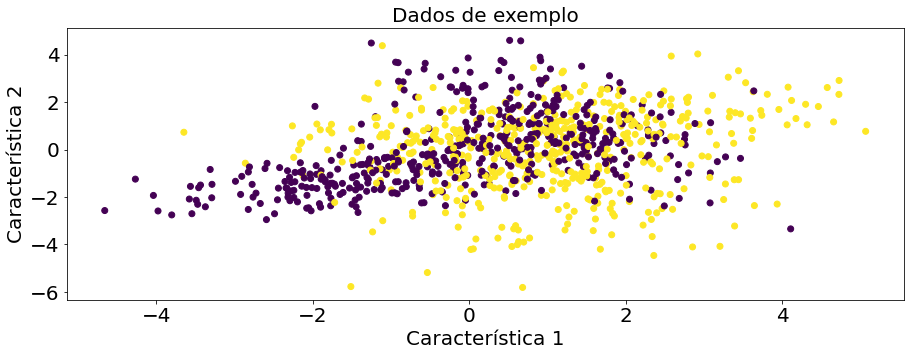

In [30]:
# visualiza os dados
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Dados de exemplo')
plt.show()

In [32]:
# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# ajusta o modelo de regressão logística aos dados de treinamento
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

# faz previsões nos dados de teste
y_pred = model.predict(X_test)

In [34]:
# calcula a acurácia e o precision
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print("Acurácia em procentagem:", acc*100)
print(f'Precision: {precision:.2f}')
print("Precisão em procentagem:", round(precision*100,2))

Acurácia: 0.83
Acurácia em procentagem: 83.5
Precision: 0.81
Precisão em procentagem: 80.9


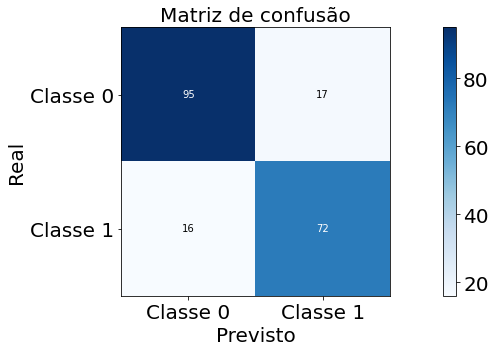

In [35]:
# plota a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Classe 0', 'Classe 1'],
       yticklabels=['Classe 0', 'Classe 1'],
       title='Matriz de confusão',
       ylabel='Real',
       xlabel='Previsto')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

# 3. Recall

### O recall é uma métrica de avaliação comum no contexto de machine learning, especialmente em problemas de classificação, onde o objetivo é prever se uma determinada amostra pertence a uma classe positiva ou negativa.

**É definido como a proporção de exemplos positivos que são corretamente identificados pelo modelo, em relação ao número total de exemplos positivos na base de dados. Em outras palavras, o recall mede a capacidade do modelo de encontrar todos os exemplos relevantes (positivos) na base de dados.**

**Uma alta taxa de recall é importante em problemas em que a classe positiva é crítica e a falha em identificá-la pode ter consequências graves.**

Por exemplo, em um sistema de detecção de fraude, uma baixa taxa de recall pode resultar em perdas financeiras significativas para a empresa.

$$
\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}
$$

* **TP**: Padrões pertencentes à Classe Positiva, que foram classificados como pertencentes à Classe Positiiva;
* **FN**: Padrões pertencentes à Classe Positiva, que foram classificados como pertencentes à Classe Negativa.

Por outro lado, é importante notar que um alto recall geralmente vem acompanhado de uma baixa precisão, que é a proporção de exemplos identificados como positivos pelo modelo que são realmente positivos. 

Portanto, é importante encontrar um equilíbrio entre recall e precisão, dependendo do problema específico que está sendo resolvido.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

# gera dados aleatórios
X, y = make_classification(n_samples = 1000, n_features = 10, 
                           n_informative = 5, n_redundant = 2, n_classes = 2, random_state = 42)

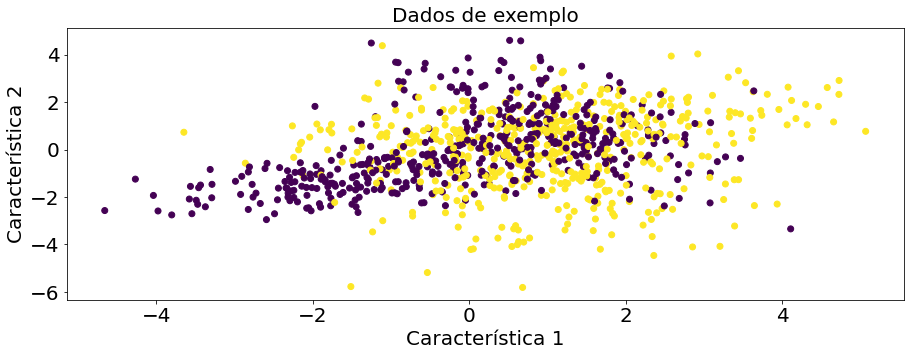

In [37]:
# visualiza os dados
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Dados de exemplo')
plt.show()

In [40]:
# calcula a acurácia, precision e recall
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Acurácia: 0.83
Precisão: 0.81
Recall: 0.82


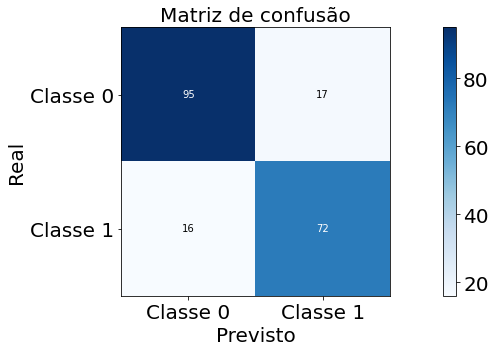

In [41]:
# plota a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Classe 0', 'Classe 1'],
       yticklabels=['Classe 0', 'Classe 1'],
       title='Matriz de confusão',
       ylabel='Real',
       xlabel='Previsto')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## Curva de Recall-Precisão

A curva de precisão-recall é uma ferramenta utilizada na avaliação de modelos de classificação binária. Ela mostra o trade-off entre a precisão e o recall do modelo para diferentes valores de threshold, que é o valor a partir do qual uma observação é classificada como positiva ou negativa. A precisão mede a fração de verdadeiros positivos em relação ao total de positivos previstos, enquanto o recall mede a fração de verdadeiros positivos em relação ao total de positivos reais.

In [42]:
# calcula os valores de precisão e recall para diferentes limiares de decisão
precision, recall, thresholds = precision_recall_curve(y_test, 
                                                       model.decision_function(X_test))

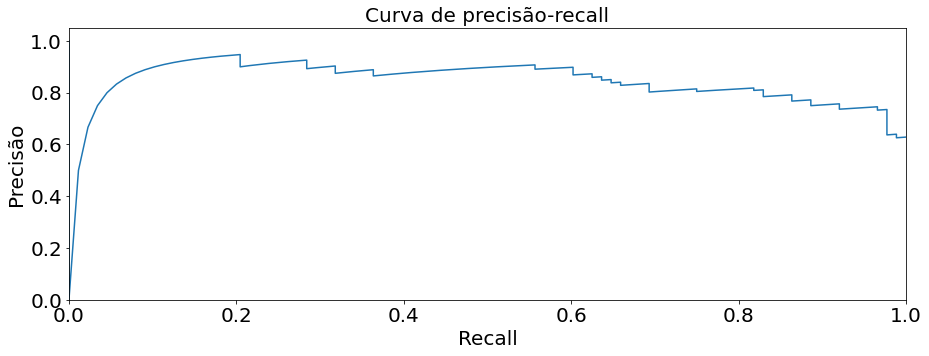

In [43]:
# plota a curva de precisão-recall manualmente
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precisão')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('Curva de precisão-recall')
plt.show()

É uma maneira de avaliar o desempenho de um modelo para diferentes valores de threshold. Um modelo ideal teria uma precisão de 1.0 e um recall de 1.0, o que significaria que ele é capaz de identificar todos os exemplos positivos e não produz falsos positivos. Na prática, é comum que haja um trade-off entre precisão e recall, e a curva de precisão-recall mostra como o desempenho do modelo se comporta para diferentes valores de threshold.

# 4. F1-Score

### O F1-score é utilizado para medir a qualidade de um modelo em relação a um conjunto de dados de teste, e é especialmente útil quando se trata de problemas de classificação.

**O F1-score é calculado a partir da precisão (ou precisão positiva) e do recall (ou taxa de verdadeiros positivos) do modelo.**

- A precisão mede a proporção de verdadeiros positivos em relação ao número total de predições positivas
- O recall mede a proporção de verdadeiros positivos em relação ao número total de exemplos positivos no conjunto de dados de teste.

O F1-score é a média harmônica dessas duas métricas, e é uma maneira útil de avaliar a qualidade geral do modelo em relação a ambos os aspectos (precisão e recall). 

Ele fornece uma única pontuação que representa a precisão do modelo para classificar exemplos como positivos ou negativos, levando em consideração tanto a precisão quanto o recall.

- Uma pontuação alta de F1-score indica que o modelo tem uma alta precisão e recall, o que significa que ele é capaz de classificar com precisão os exemplos positivos e negativos em um conjunto de dados de teste. 

- Uma pontuação baixa de F1-score indica que o modelo pode estar sofrendo de problemas como superajuste (overfitting) ou subajuste (underfitting), ou pode não estar considerando adequadamente as características importantes dos dados.

$$
\text{F1-Score} =  2 * \frac{\text{Precisão}*\text{Recall}}{\text{Precisão}+\text{Recall}}
$$

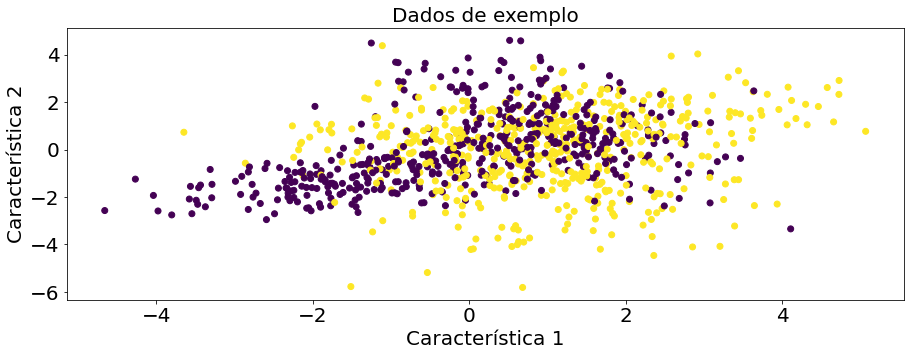

In [44]:
# visualiza os dados
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Dados de exemplo')
plt.show()

In [45]:
# calcula a acurácia, precision, recall e f1-score
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1:.2f}')

Acurácia: 0.83
Precision: 0.81
Recall: 0.82
F1-score: 0.81


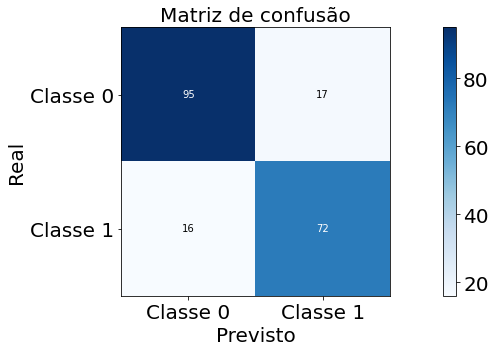

In [46]:
# plota a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Classe 0', 'Classe 1'],
       yticklabels=['Classe 0', 'Classe 1'],
       title='Matriz de confusão',
       ylabel='Real',
       xlabel='Previsto')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

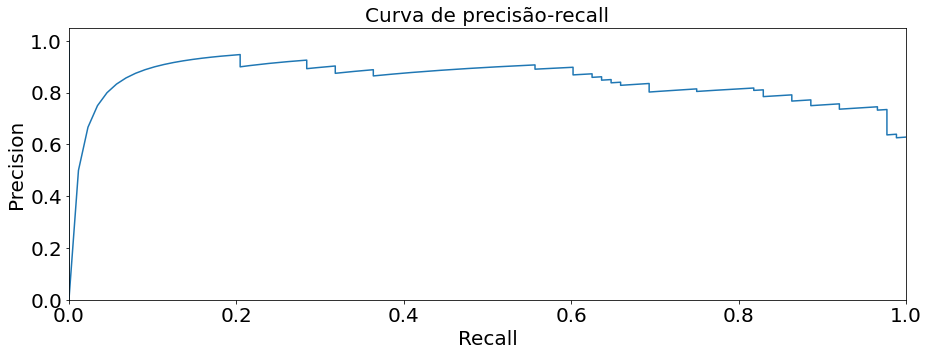

In [47]:
# calcula os valores de precisão e recall para diferentes limiares de decisão
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test))
# plota a curva de precisão-recall manualmente
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('Curva de precisão-recall')
plt.show()

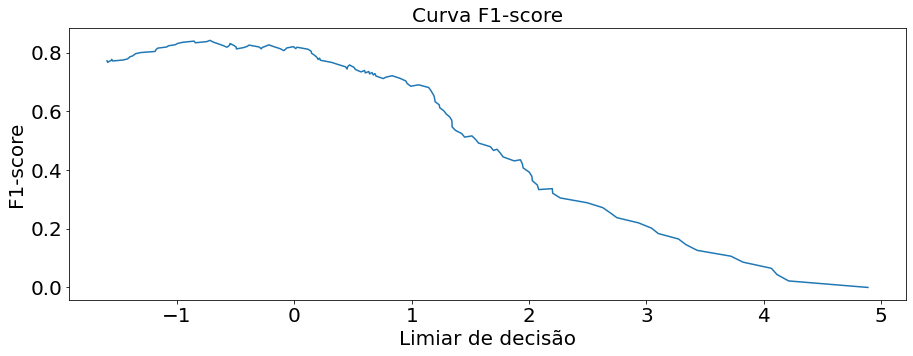

In [48]:
# calcula os valores de precisão, recall e F1-score para diferentes limiares de decisão
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test))

# calcula o F1-score
f1_score = np.zeros_like(precision)
mask = (precision + recall) > 0
f1_score[mask] = 2 * (precision[mask] * recall[mask]) / (precision[mask] + recall[mask])

# plota a curva F1-score
fig, ax = plt.subplots()
ax.plot(thresholds, f1_score[:-1])
ax.set_xlabel('Limiar de decisão')
ax.set_ylabel('F1-score')
ax.set_title('Curva F1-score')
plt.show()

A curva F1-score mostra a relação entre o limiar de decisão do modelo e o valor do F1-score. Isso pode ser útil para ajudar a determinar o limiar de decisão ótimo para o modelo, que maximiza o valor do F1-score.

# 5. Exemplo de Classificação Binária (*One Versus All*)

<img src="imagens/10.png">

<img src="imagens/11.png">

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
import os

warnings.filterwarnings('ignore')

In [51]:
# Carregar a base de dados MNIST
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int32')

In [52]:
# Separar a base de dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
# Criar e treinar o modelo de Regressão Logística
lr = LogisticRegression(random_state = 42, max_iter = 1000)
lr.fit(X_train, y_train)

# Criar e treinar o modelo de Árvore de Decisão
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

# Criar e treinar o modelo de Rede Neural Artificial
mlp = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 1000, random_state = 42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [54]:
# Prever os rótulos dos dados de teste
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_mlp = mlp.predict(X_test)

# Calcular a acurácia de cada modelo
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Acurácia Regressão Logística: {acc_lr:.4f}")
print(f"Acurácia Árvore de Decisão: {acc_dt:.4f}")
print(f"Acurácia Rede Neural Artificial: {acc_mlp:.4f}")

Acurácia Regressão Logística: 0.9136
Acurácia Árvore de Decisão: 0.8684
Acurácia Rede Neural Artificial: 0.9572


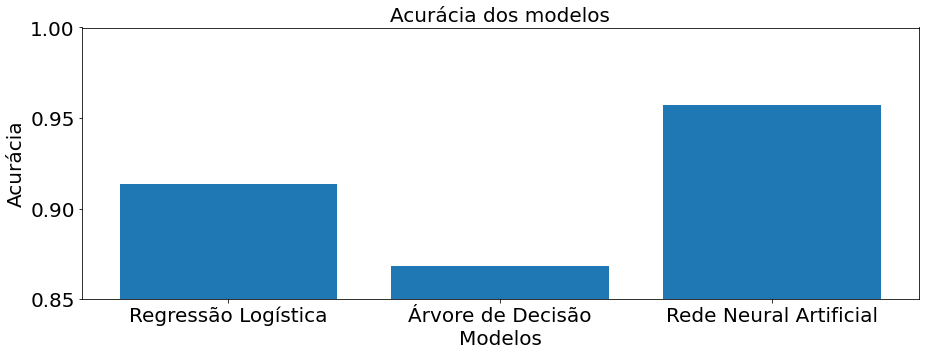

In [55]:
# Criar um gráfico de barras para comparar as acurácias dos modelos
models = ['Regressão Logística', 'Árvore de Decisão', 'Rede Neural Artificial']
accuracies = [acc_lr, acc_dt, acc_mlp]

plt.bar(models, accuracies)
plt.ylim(0.85, 1.0)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.show()

In [56]:
from sklearn.metrics import classification_report

# Calcular as métricas de precisão, recall e f1-score para cada modelo
report_lr = classification_report(y_test, y_pred_lr)
report_dt = classification_report(y_test, y_pred_dt)
report_mlp = classification_report(y_test, y_pred_mlp)

In [57]:
print("Relatório de classificação Regressão Logística:")
print(report_lr)

Relatório de classificação Regressão Logística:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2058
           1       0.95      0.97      0.96      2364
           2       0.90      0.89      0.89      2133
           3       0.89      0.89      0.89      2176
           4       0.92      0.93      0.92      1936
           5       0.90      0.85      0.87      1915
           6       0.93      0.94      0.93      2088
           7       0.93      0.93      0.93      2248
           8       0.88      0.86      0.87      1992
           9       0.89      0.91      0.90      2090

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



In [58]:
print("Relatório de classificação Árvore de Decisão:")
print(report_dt)

Relatório de classificação Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2058
           1       0.94      0.96      0.95      2364
           2       0.86      0.84      0.85      2133
           3       0.83      0.84      0.84      2176
           4       0.85      0.87      0.86      1936
           5       0.83      0.81      0.82      1915
           6       0.90      0.90      0.90      2088
           7       0.91      0.90      0.91      2248
           8       0.82      0.78      0.80      1992
           9       0.83      0.84      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [59]:
print("Relatório de classificação Rede Neural Artificial:")
print(report_mlp)

Relatório de classificação Rede Neural Artificial:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2058
           1       0.97      0.98      0.98      2364
           2       0.95      0.95      0.95      2133
           3       0.94      0.95      0.95      2176
           4       0.96      0.96      0.96      1936
           5       0.94      0.95      0.94      1915
           6       0.97      0.98      0.97      2088
           7       0.96      0.97      0.96      2248
           8       0.95      0.91      0.93      1992
           9       0.95      0.95      0.95      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



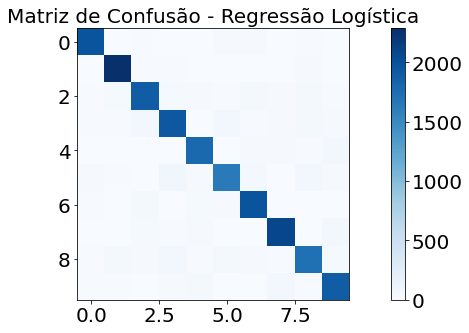

In [60]:
# Obter a matriz de confusão para cada modelo
lr_cm = confusion_matrix(y_test, lr.predict(X_test))
dt_cm = confusion_matrix(y_test, dt.predict(X_test))
mlp_cm = confusion_matrix(y_test, mlp.predict(X_test))

# Plotar a matriz de confusão para cada modelo
plt.imshow(lr_cm, cmap=plt.cm.Blues, vmin=0, vmax=lr_cm.max()) 
plt.title('Matriz de Confusão - Regressão Logística')
plt.colorbar()
plt.show()

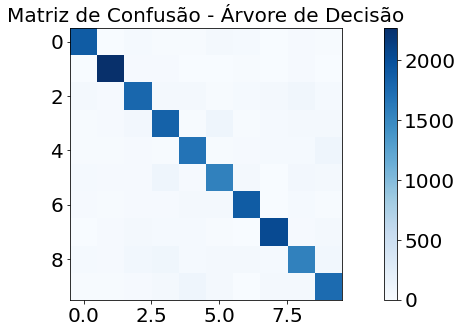

In [61]:
plt.imshow(dt_cm, cmap=plt.cm.Blues, vmin=0, vmax=dt_cm.max()) 
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.colorbar()
plt.show()

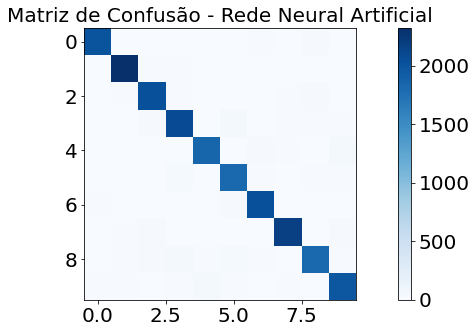

In [62]:
plt.imshow(mlp_cm, cmap=plt.cm.Blues, vmin=0, vmax=mlp_cm.max()) 
plt.title('Matriz de Confusão - Rede Neural Artificial')
plt.colorbar()
plt.show()